In [5]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt 

In [6]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()   #加载MNIST数据集
x_train = x_train.reshape(-1,784).astype('float32')/255   #训练集图像打平并归一化 
x_test = x_test.reshape(-1,784).astype('float32')/255     

In [7]:
class Autoencoder(tf.keras.Model):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.Encoder = tf.keras.models.Sequential([   #编码器网络
            layers.Dense(512, kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(256, kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(60, kernel_initializer = 'normal', activation = 'relu')
        ])
        self.Decoder = tf.keras.models.Sequential([   #解码器网络
            layers.Dense(256, kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(512, kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(784, kernel_initializer = 'normal', activation = 'sigmoid')
        ])
    def call(self,input_features,training = None):   #前向传播
        code = self.Encoder(input_features)   #数据编码
        reconstructed = self.Decoder(code)   #数据解码
        return reconstructed


In [8]:
model = Autoencoder()                     #模型创建
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')  

In [9]:
model.fit(x_train,x_train, epochs = 10, batch_size = 256, shuffle = True, validation_data = (x_test[:4000], x_test[:4000]))   

Epoch 1/10
235/235 [==============================] - 9s 29ms/step - loss: 0.2981 - val_loss: 0.1372
Epoch 2/10
235/235 [==============================] - 7s 30ms/step - loss: 0.1275 - val_loss: 0.1094
Epoch 3/10
235/235 [==============================] - 7s 29ms/step - loss: 0.1053 - val_loss: 0.0978
Epoch 4/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0962 - val_loss: 0.0920
Epoch 5/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0914 - val_loss: 0.0892
Epoch 6/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0882 - val_loss: 0.0866
Epoch 7/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0858 - val_loss: 0.0847
Epoch 8/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0839 - val_loss: 0.0833
Epoch 9/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0823 - val_loss: 0.0814
Epoch 10/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0811 - val_lo

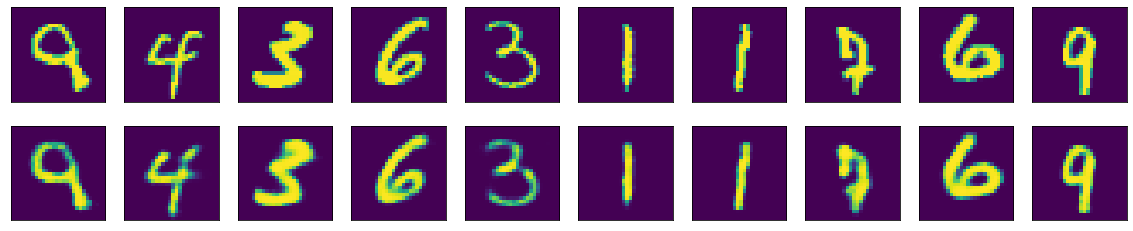

In [10]:
decoded_imgs = model.predict(x_test[4000:])
#原图片与重构后的图片对比
plt.figure(figsize = (20, 4))
n = 10
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(tf.reshape(x_test[4000+i], [28, 28]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
